In [2]:
from pyopencga.opencga_config import ClientConfiguration
from pyopencga.opencga_client import OpencgaClient
from dotenv import dotenv_values



In [34]:
secret = dotenv_values()
config = ClientConfiguration({
        'rest': {
            'host': 'https://agvd-rps.h3abionet.org/opencga-2.6.2-SNAPSHOT/'}})
client = OpencgaClient(config)
client.login(secret['AGVD_USERNAME'], secret['AGVD_PASSWORD'])
token = client.token

[WARNING]: Client version (2.8.0-SNAPSHOT) is higher than server version (2.6.2). Some client features may not be implemented in the server.


In [35]:
client = OpencgaClient(config,token)

[WARNING]: Client version (2.8.0-SNAPSHOT) is higher than server version (2.6.2). Some client features may not be implemented in the server.


In [47]:
# client.cohorts.search(study='wilson@agvp:h3awgs').get_results()

In [13]:
# client.cohorts.delete(cohorts='epsilon',study='wilson@agvp:h3awgs').get_results()

[]

In [11]:
# client.cohorts.create(data={'id': 'epsilon', 'name':'epsilon','samples':[{"id" : "H3A-D3A6FE"},{"id" : "H3A-A40E96"},{'id': 'H3A-220073'} ],}, study='wilson@agvp:h3awgs').get_results()

[]

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
regions = pd.read_csv('/data/vcf/h3awgs/clusters.tsv', sep='\t')
meta  = pd.read_csv('/data/vcf/h3awgs/samples.meta.tsv', sep='\t', index_col='SampleID')
meta_dict = meta.iloc[:,[0]].to_dict()
countries = meta_dict.get('Country')
regions["Country"] =  regions['SampleID'].map(lambda x: countries.get(x))
regions.head()

,SampleID,cluster,Country
0,H3A-7C44F2,Western,Guinea
1,H3A-B4DD3C,Western,Cote D'Ivoire
2,H3A-31F23C,Eastern,Uganda
3,H3A-D3A6FE,Eastern,Uganda
4,H3A-0BF47F,Western,Guinea


In [45]:
region_clusters = {}
for region in regions.cluster.unique():
    df = regions[regions['cluster'] == region]
    region_clusters[region] = df.Country.unique()
    # print(f'{region} cluster',df.Country.unique())
    clus = []
    for country in df.Country.unique():
        df3 = regions[(regions['Country'] == country)]
        clus.extend(df3.to_dict()['SampleID'].values())
    # print(f'{region}_v1',list(map(lambda x: {'id': x}, clus)))
    client.cohorts.create(data={'id': f'{region}_v1', 'name':f'{region}_v1','samples':list(map(lambda x: {'id': x}, clus))}, study='wilson@agvp:h3awgs').get_results()

In [17]:
clusters = pd.read_csv('output/cluster/cluster.tsv', sep='\t')
clusters.head()

,SampleID,Cluster,Country
0,H3A-7C44F2,Delta,Guinea
1,H3A-B4DD3C,Delta,Cote D'Ivoire
2,H3A-31F23C,Beta,Uganda
3,H3A-D3A6FE,Beta,Uganda
4,H3A-0BF47F,Delta,Guinea


In [37]:
computational_clusters = {}
for cluster in clusters.Cluster.unique():
    df = clusters[clusters['Cluster'] == cluster]
    computational_clusters[cluster] = df.Country.unique()
    clust = []
    for country in df.Country.unique():
        df2 = clusters[(clusters['Country'] == country) & (clusters['Cluster'] == cluster)]
        clust.extend(df2.to_dict()['SampleID'].values())
    # print(f'{cluster}_v1',list(map(lambda x: {'id': x}, clust)))
    client.cohorts.create(data={'id': f'{cluster}_v1', 'name':f'{cluster}_v1','samples':list(map(lambda x: {'id': x}, clust))}, study='wilson@agvp:h3awgs').get_results()

In [28]:
51+61+148+46+80

386

In [48]:
vec = pd.read_table('output/pca/plink/h3a_wgs.eigenvec', header=None, sep='\s+', engine='python')
vec.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,H3A-7C44F2,H3A-7C44F2,-0.034223,0.058752,0.093592,0.009723,-0.043088,0.000323,-0.005085,0.050255,...,-0.085323,-0.043453,0.011542,-0.056800,-0.004629,-0.024886,-0.081536,-0.113551,0.091701,0.098972
1,H3A-B4DD3C,H3A-B4DD3C,-0.025685,0.064412,0.067200,0.006859,-0.007061,0.015771,-0.018522,0.026546,...,0.001353,-0.028462,-0.041034,-0.039860,-0.000918,0.058257,-0.006358,0.030699,-0.002782,-0.044072
2,H3A-31F23C,H3A-31F23C,-0.063886,-0.024561,0.046533,-0.090492,0.007689,-0.028224,-0.043380,-0.055852,...,0.009442,-0.005870,0.007242,-0.034950,0.005484,-0.035543,0.089054,-0.057643,-0.070711,-0.010556
3,H3A-D3A6FE,H3A-D3A6FE,-0.146803,-0.018440,-0.057242,0.033928,0.032195,-0.010065,0.013168,-0.013795,...,0.016108,-0.024910,-0.007408,0.000470,0.016086,0.013339,-0.001661,0.036067,-0.019752,0.009181
4,H3A-0BF47F,H3A-0BF47F,-0.037333,0.059711,0.103281,0.022483,-0.079042,0.026247,0.006138,0.093322,...,-0.050618,-0.136568,0.126337,0.025698,-0.098284,-0.012412,-0.039049,0.212650,0.143699,-0.239268


In [52]:
vec.shape, regions.shape

((386, 22), (381, 3))

In [54]:
vec[['Country', 'Cluster']] = clusters[['Country', 'Cluster']].values

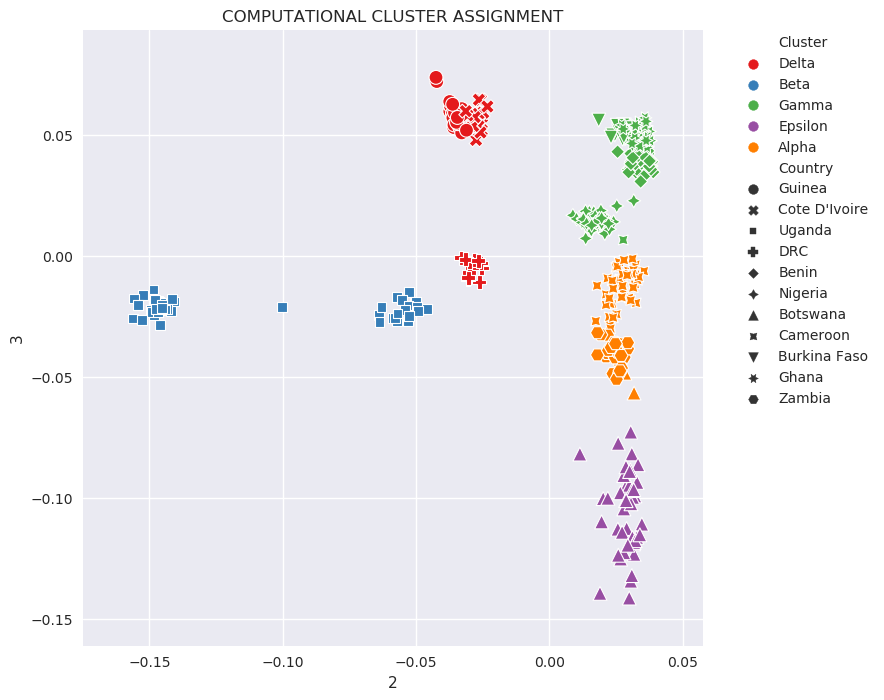

In [75]:
plt.style.use("seaborn")
plt.figure(figsize=(8, 8))

ped_cluster_plot = sns.scatterplot(
    x=vec.iloc[:,2],
    y=vec.iloc[:,3] ,
    data=vec, 
    hue=clusters['Cluster'], 
    style=clusters['Country'],
    palette="Set1",
    s=100
    )
ped_cluster_plot.set_title('COMPUTATIONAL CLUSTER ASSIGNMENT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0) 
plt.savefig('output/plots/computational_cluster_assignment.png', bbox_inches='tight')
plt.show()

In [59]:
vec2 = vec.iloc[:,[1,2,3]]
vec2.head()

,1,2,3
0,H3A-7C44F2,-0.034223,0.058752
1,H3A-B4DD3C,-0.025685,0.064412
2,H3A-31F23C,-0.063886,-0.024561
3,H3A-D3A6FE,-0.146803,-0.018440
4,H3A-0BF47F,-0.037333,0.059711


In [63]:
vec2.set_index(vec2.iloc[:,0],inplace= True)
vec2.head()

,1,2,3
1,,,
H3A-7C44F2,H3A-7C44F2,-0.034223,0.058752
H3A-B4DD3C,H3A-B4DD3C,-0.025685,0.064412
H3A-31F23C,H3A-31F23C,-0.063886,-0.024561
H3A-D3A6FE,H3A-D3A6FE,-0.146803,-0.018440
H3A-0BF47F,H3A-0BF47F,-0.037333,0.059711


In [64]:
meta_region = regions
meta_region.set_index('SampleID', inplace=True)
meta_region.head()

,cluster,Country
SampleID,,
H3A-7C44F2,Western,Guinea
H3A-B4DD3C,Western,Cote D'Ivoire
H3A-31F23C,Eastern,Uganda
H3A-D3A6FE,Eastern,Uganda
H3A-0BF47F,Western,Guinea


In [70]:
vec3 = vec2.join(meta_region,how='inner')
vec3.head()

,1,2,3,cluster,Country
H3A-7C44F2,H3A-7C44F2,-0.034223,0.058752,Western,Guinea
H3A-B4DD3C,H3A-B4DD3C,-0.025685,0.064412,Western,Cote D'Ivoire
H3A-31F23C,H3A-31F23C,-0.063886,-0.024561,Eastern,Uganda
H3A-D3A6FE,H3A-D3A6FE,-0.146803,-0.018440,Eastern,Uganda
H3A-0BF47F,H3A-0BF47F,-0.037333,0.059711,Western,Guinea


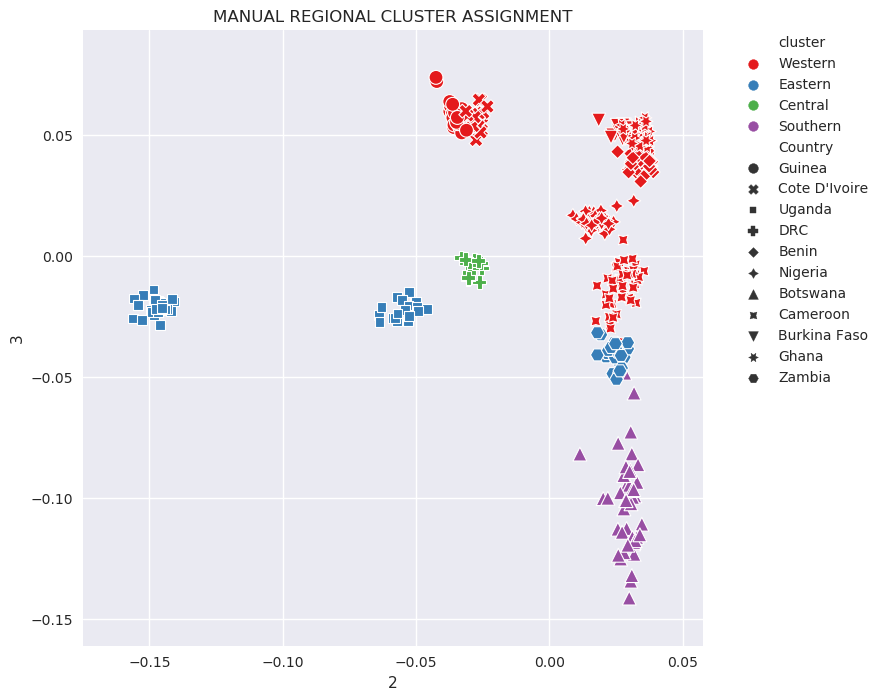

In [74]:
plt.style.use("seaborn")
plt.figure(figsize=(8, 8))

ped_cluster_plot = sns.scatterplot(
    x=vec3.iloc[:,1],
    y=vec3.iloc[:,2] ,
    data=vec3, 
    hue=vec3['cluster'], 
    style=vec3['Country'],
    palette="Set1",
    s=100
    )
ped_cluster_plot.set_title('MANUAL REGIONAL CLUSTER ASSIGNMENT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0) 
plt.savefig('output/plots/manual_cluster_assignment.png', bbox_inches='tight')
plt.show()

In [72]:
vec3.shape

(381, 5)